In [5]:
import subprocess
import numpy as np
from matplotlib.pyplot import *

In [33]:
results = []
for block_size in np.hstack((np.linspace(12, 10000, 100).astype(int), [500])):
    out = subprocess.run(['./comm_volume','--m_dim=100000', '--n_dim=100000', '--block_a=%d,%d' % (block_size, block_size), '--p_grid_a=10,10', '--p_grid_c=10,10'], capture_output=True)
    try:
        results.append({'bsize': block_size, 'reduction': float(out.stdout)})
    except ValueError:
        results.append({'bsize': block_size, 'reduction': 'nan'})

In [34]:
d = np.array([(x['bsize'], x['reduction']) for x in sorted(results, key=lambda x: x['bsize'])])

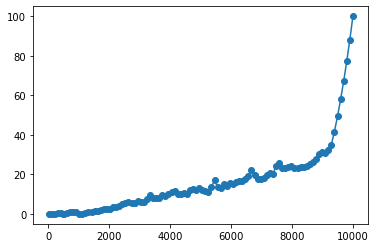

In [37]:
plot(d[:,0], d[:,1], '-o')
savefig('out.png')
grid(False)

In [36]:
np.savetxt('pgrid10x10_100k_square.txt', d)

In [15]:
results = []
for block_size in np.hstack((np.linspace(12, 10000, 100).astype(int), [500])):
    out = subprocess.run(['./comm_volume','--m_dim=10000', '--n_dim=10000', '--block_a=%d,%d' % (block_size, block_size), '--p_grid_a=5,4', '--p_grid_c=4,5'], capture_output=True)
    try:
        results.append({'bsize': block_size, 'reduction': float(out.stdout)})
    except ValueError:
        results.append({'bsize': block_size, 'reduction': 'nan'})

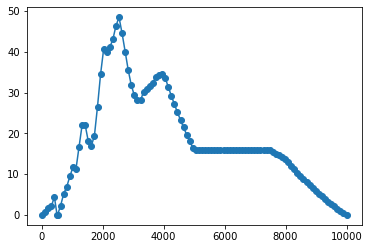

In [16]:
d = np.array([(x['bsize'], x['reduction']) for x in sorted(results, key=lambda x: x['bsize'])])
plot(d[:,0], d[:,1], '-o')
savefig('out.png')
grid(False)